<a href="https://colab.research.google.com/github/keng-oh/colab/blob/master/opencv_and_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCVによる画像の前処理とfine-tuning

In [0]:
# データセットのダウンロード
# 2回目以降は実行する必要はありません
from urllib import request

# trainデータのダウンロード
url = 'https://s3-ap-northeast-1.amazonaws.com/ai-std/lena.png'
request.urlretrieve(url, 'lenna.png')

('lenna.png', <http.client.HTTPMessage at 0x7fc42d5db278>)

In [0]:
! pip install opencv-python

In [0]:
# ライブラリの読み込み
import cv2 # OpenCVはcv2という名称で扱われる
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

In [0]:
# 画像の読み込み
img = cv2.imread('lenna.png')

# 画像の型を確認
type(img)

# 画像の形を確認
img.shape

(512, 512, 3)

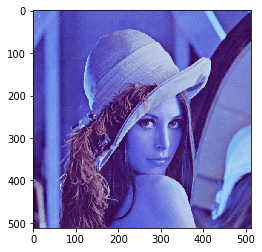

In [0]:
# matplotによる画像表示
# 画像が青みがかっていることに注意
plt.imshow(img)

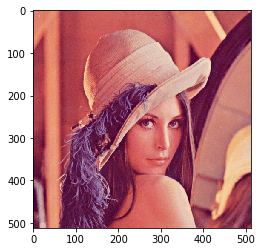

In [0]:
# BGRをRGBに変換する
# (画像, 変換の仕方)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [0]:
# 画像データの保存
# (保存先パス, 画像)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('new_lenna.jpg', img)

True

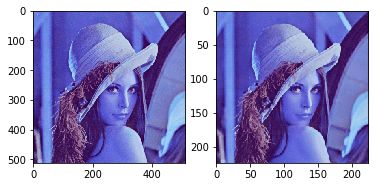

In [0]:
# 画像のリサイズ
# (画像, 変換後のサイズを表すタプル)
resized = cv2.resize(img, (224, 224))

# リサイズを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# リサイズを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(resized)

In [0]:
# 変換前後の画像の形を出力
print(img.shape)
print(resized.shape)

(512, 512, 3)
(224, 224, 3)


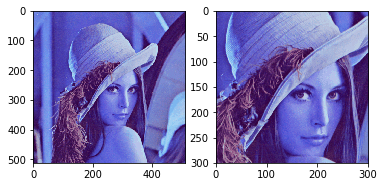

In [0]:
# 画像のクロップを実行
# 数値を指定して実行
cropped_1 = img[100:400,100:400,:]

# クロップを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# クロップを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(cropped_1)

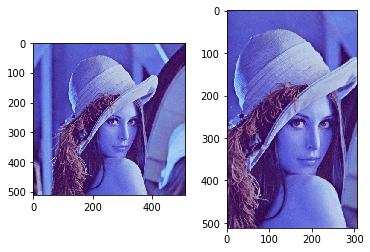

In [0]:
# 画像のクロップを実行
# 比率を指定して実行
h, w, c = img.shape
cropped_2 = img[:, int(w * (1/5)): int(w *(4/5)), :]

# クロップを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# クロップを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(cropped_2)

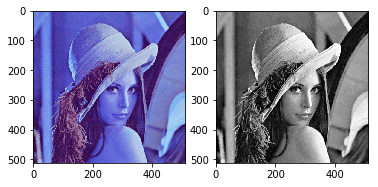

In [0]:
# グレースケール化の実行
grayed = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# グレースケール化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# グレースケール化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(grayed)
plt.gray()

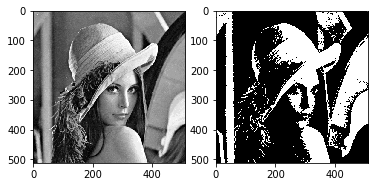

In [0]:
# 2値化を実行
# (画像（グレースケール）, しきい値, 明るさの上限, しきい値の取り方)
th, binary = cv2.threshold(grayed, 125, 255, cv2.THRESH_BINARY)

# グレースケール化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(grayed)
# グレースケール化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(binary)
plt.gray()

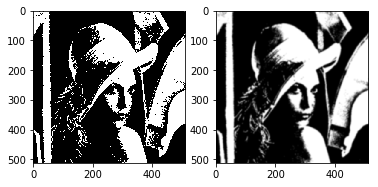

In [0]:
# 平滑化を実行
# ガウシアンフィルタを利用
# (画像, 平滑化の粗さを表す奇数のタプル, 標準偏差)
blurred = cv2.GaussianBlur(binary, (11, 11), 0)

# 平滑化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(binary)
# 平滑化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(blurred)

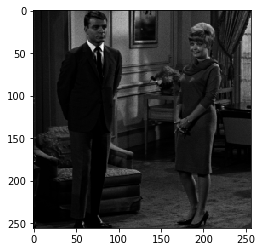

In [0]:
# 暗い画像を出力
# imread関数に引数0を渡すと､初めからグレースケールになる

url = 'https://s3-ap-northeast-1.amazonaws.com/ai-std/4.1.02.tiff'
request.urlretrieve(url, '4.1.02.tiff')

img_2 = cv2.imread('4.1.02.tiff', 0)
plt.imshow(img_2)

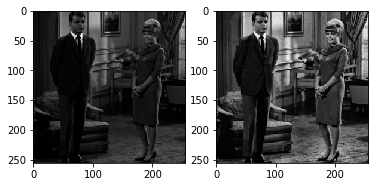

In [0]:
# CLAHEの処理を実行
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img_2)

# 平滑化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img_2)
# 平滑化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(cl1)

In [0]:
# 3章で利用したtrainデータの読み込み
import pickle
with open('train.pickle', 'rb') as f:
    train = pickle.load(f, encoding='bytes')
X_train = train['data']

# スケーリング処理
X_train /= 255 # 正規化
X_train -= np.mean(X_train) # Mean Substruction

FileNotFoundError: ignored

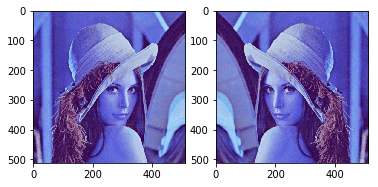

In [0]:
# flipを行う
flipped = cv2.flip(img, 1)

# flipを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# flipを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(flipped)

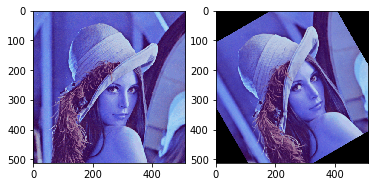

In [0]:
# 表示する画像のサイズ(変換前と同じサイズに指定)
size = (img.shape[0], img.shape[1])
# 回転の中心位置を表す座標（画像の中心に指定）
center = (int(size[0]/2), int(size[1]/2))
# 回転角度
angle = 30
# 拡大･縮小の比率（拡大･縮小なしに指定）
scale = 1.0

# 回転変換を表す行列をつくる
# (中心位置, 回転角度, 拡大･縮小の比率)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
# 回転変換を行う
# (画像, 回転行列, 変換後の画像サイズ)
rotated = cv2.warpAffine(img, rotation_matrix, size)

# rotateを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# rotateを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(rotated)

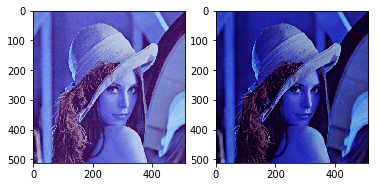

In [0]:
# ガンマ値を指定
gamma = 0.5

# 色対応表を定義
look_up_table = np.zeros((256, 1), dtype='uint8')
# すべての対応表を事前に計算しておく
for i in range(256):
    look_up_table[i][0] = 255 * pow(float(i) / 255, 1.0 / gamma)
img_gamma = cv2.LUT(img, look_up_table)

# ガンマ変換を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# ガンマ変換を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(img_gamma)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


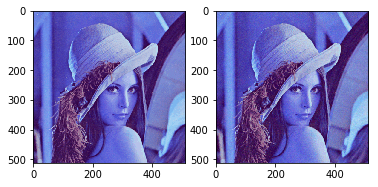

In [0]:
# 変換後の画像のサイズを指定
row, col, ch = img.shape

# ガウス分布の平均と標準編纂を指定
mean = 0
sigma = 5
# imgと同じサイズのノイズ画像を生成
noise = np.random.normal(mean, sigma, (row, col, ch))
noise = noise.reshape(row,col,ch)
# imgにノイズ画像を被せる
noised = img + noise
noised /= 255

# ノイズを加える前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)

# ノイズを加えた後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(noised)

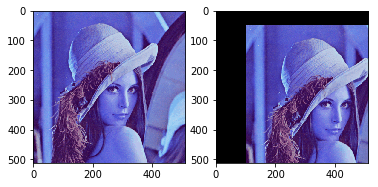

In [0]:
# 変換後の画像のサイズを指定
rows, cols, channnels = img.shape
# 変換行列
M = np.float32([[1,0,100],[0,1,50]])
# 並進移動の実行
moved = cv2.warpAffine(img, M, (cols, rows))

# 並進移動を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# 並進移動を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(moved)

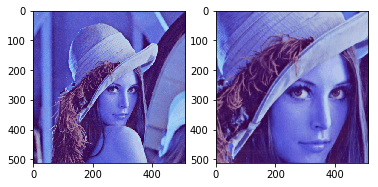

In [0]:
# 画像サイズを一度拡大する
zoomed_in = cv2.resize(img, None, fx=2.0, fy=2.0)

# 変換前後のshapeを指定する
height_1, width_1, channel_1 = img.shape
height_2, width_2, channel_2 = zoomed_in.shape

# x、y軸それぞれの切り取り開始点の決定
# ピクセルの指定は整数になるようにする
x =  int((width_2 - width_1) / 2)
y =  int((height_2 - height_1) / 2)

#切り取り開始点から元の画像分のサイズを切り取る
zoomed_in = zoomed_in[y:y+height_1, x:x+width_1]

# 拡大前の画像を出力
plt.subplot(121)
plt.imshow(img)
# 拡大後の画像を出力
plt.subplot(122)
plt.imshow(zoomed_in)

In [0]:
# 必要なライブラリの読み込み
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

import keras
from keras.models import Sequential           #層構造のモデルを定義するためのメソッド
from keras.layers import Dense, Activation          #Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import Adam
import tensorflow as tf

Using TensorFlow backend.


In [0]:
# pickle形式のファイルを読み込む関数
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        list = pickle.load(fo, encoding='bytes')
    return list

In [0]:
# ダウンロードしたファイルはpickle形式で保存されているため、扱いやすいように読み込む
train = unpickle('train.pickle')
test = unpickle('test.pickle')
label = unpickle('label.pickle')

FileNotFoundError: ignored

In [0]:
# 訓練用データ(2500件)
# テスト用データ(500件)
N_train = len(train)
N_test = len(test)
X_train = train['data']
X_test = test['data']
y_train = train['label']
y_test = test['label']

#one-hotエンコーディング
Y_train = np.identity(5)[y_train].astype('i')
Y_test = np.identity(5)[y_test].astype('i')

#Opencv, Kerasの仕様のため(サンプル数, height, width, channel)に変換
X_train = X_train.transpose([0, 2, 3, 1])
X_test = X_test.transpose([0, 2, 3, 1])

In [0]:
from keras.layers import Input, Activation, Flatten, Dropout
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

# 入力画像のサイズを指定
input_tensor = Input(shape=(32, 32, 3))

# 学習済みモデルの読み込み
# ダウンロードに数十分かかります
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

In [0]:
# 必要なパラメータの追加
input_height = 32
input_width = 32
n_class = 5

# 学習済みモデルに加える全結合層部分を定義
# 最終層はノード数がクラスラベルの数に一致していないのでスライシングで取り除く
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256))
top_model.add(Activation('relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(n_class))
top_model.add(Activation('softmax'))

In [0]:
# base_modelとtop_modelを接続
from keras.models import Model
model = Model(input=base_model.input, output=top_model(base_model.output))

In [0]:
# 畳み込み層の重みを固定（学習させない）
for layer in model.layers[:15]:
        layer.trainable = False

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.0001),
              metrics=['accuracy'])

In [0]:
# モデル構造の確認
model.summary()

In [0]:
batch_size = 100
n_epoch = 1 # 簡単に動作確認をするため､epochを1に設定

In [0]:
# data augmentationを行う関数
def get_augmented(img, random_crop=4):

    # 左右反転のノイズを加える
    if np.random.rand() > 0.5:
        img = np.fliplr(img)
        
    # 左右どちらかに30度回転させる
    if np.random.rand() > 0.5:
        size = (img.shape[0], img.shape[1])
        # 画像の中心位置(x, y)
        center = (int(size[0]/2), int(size[1]/2))
        # 回転させたい角度
        angle = np.random.randint(-30, 30)
        # 拡大比率
        scale = 1.0
        # 回転変換行列の算出
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
        # 並進移動
        img = cv2.warpAffine(img, rotation_matrix, size, cv2.INTER_CUBIC)
    
    return img

In [0]:
# 画像の前処理を行う関数
def process_image(image):
    
    # サイズをVGG16指定のものに変換する
    image = cv2.resize(image, (32, 32))
    
    # RGBからそれぞれvgg指定の値を引く(mean-subtractionに相当)
    image[:, :, 0] -= 100
    image[:, :, 1] -= 116.779
    image[:, :, 2] -= 123.68
    
    # 0-1正規化
    image /= image.max()
    
    # augmentation
    image = get_augmented(image)
    
    return image

In [0]:
# 画像の前処理を行う関数
def process_image(image):
    
    # サイズをVGG16指定のものに変換する
    image = cv2.resize(image, (32, 32))
    
    # RGBからそれぞれvgg指定の値を引く(mean-subtractionに相当)
    image[:, :, 0] -= 100
    image[:, :, 1] -= 116.779
    image[:, :, 2] -= 123.68
    
    # 0-1正規化
    image /= image.max()
    
    # augmentation
    image = get_augmented(image)
    
    return image

In [0]:
# 同じように学習完了後、histから結果を確認できます。
hist = model.fit(X_train_aug,
                 Y_train,
                 epochs=n_epoch,
                 validation_data=(X_test_aug, Y_test),
                 verbose=1,
                 batch_size=batch_size)